# Time Series Modeling and Forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_ts = pd.read_csv('../../data/Biomass_History.csv', index_col=0)
d_matrix = pd.read_csv('../../data/Distance_Matrix.csv', index_col=0)
df_ts.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
Index,,,,,,,,,,
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


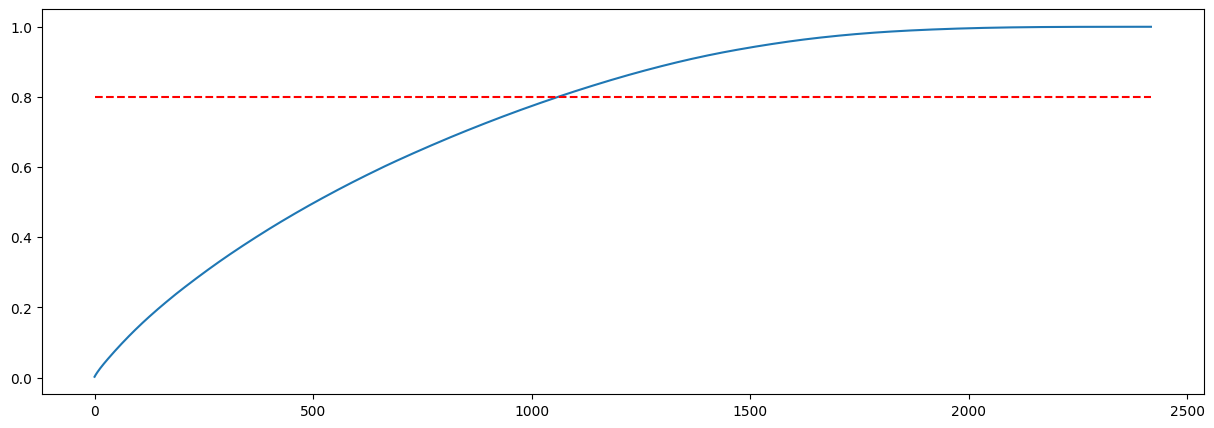

In [15]:
df_fc_avg = df_ts.drop(columns=['Latitude', 'Longitude']).mean(axis=1).to_frame()
df_fc_avg.columns = ['biomass']
df_fc_avg.sort_values(by='biomass', ascending=False, inplace=True)
df_fc_avg['cum_biomass'] = df_fc_avg.biomass.cumsum()
df_fc_avg['cum_biomass_pct'] = df_fc_avg.cum_biomass / df_fc_avg.biomass.sum()
df_fc_avg['cum_biomass_pct'].reset_index(drop=True).plot(figsize=(15, 5))
plt.plot([0, 2418], [0.8, 0.8], 'r--')

In [35]:
import numpy as np
d_max = 1000.
idxs_dist = np.where(d_matrix.values <= d_max)
# idxs_dist = idxs_dist[idxs_dist <= d_max].index.tolist()
len(np.unique(idxs_dist[1]))

2418

<Axes: >

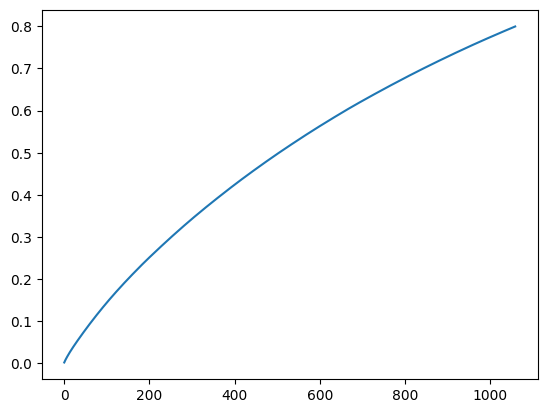

In [25]:
idxs_tops = df_fc_avg[df_fc_avg['cum_biomass_pct'] <= 0.8].index
df_fc_thr = df_fc_avg.loc[idxs_tops, :]
df_fc_thr['cum_biomass_pct'].reset_index(drop=True).plot()

In [18]:
idxs_tops = df_fc_avg[df_fc_avg['cum_biomass_pct'] <= 0.8].index

1337


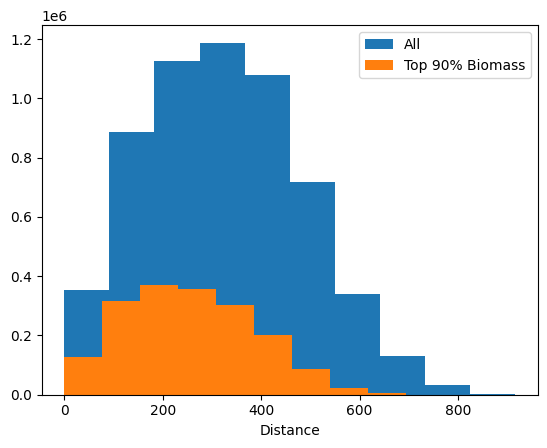

In [44]:
idxs_tops = df_fc_avg[df_fc_avg['cum_biomass_pct'] <= 0.9].index
print(len(idxs_tops))
plt.hist(d_matrix.values.reshape(-1), label='All')
plt.hist(d_matrix.iloc[idxs_tops, idxs_tops].values.reshape(-1), label='Top 90% Biomass')
plt.xlabel('Distance')
plt.legend()

<Axes: >

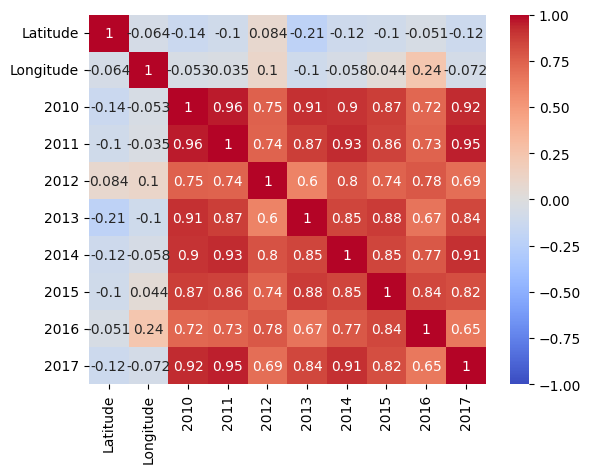

In [3]:
import seaborn as sns
df_corr = df_ts.iloc[:, :].corr()
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

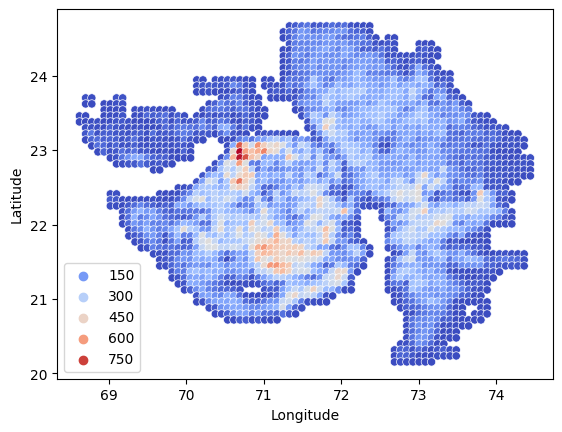

In [4]:
df_avg = df_ts.iloc[:, 2:].mean(axis=1)
sns.scatterplot(x='Longitude', y='Latitude', data=df_ts, hue=df_avg, palette='coolwarm')

In [17]:
df_ts.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
Index,,,,,,,,,,
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [22]:
df_ts['2017']

Index
0         5.180296
1        42.126945
2        73.203232
3       101.067352
4        26.086885
           ...    
2413      5.321604
2414      0.120626
2415      0.038879
2416      1.304297
2417      0.226953
Name: 2017, Length: 2418, dtype: float64

In [40]:
center = 20
df_center = d_matrix.loc[[center], :].T
df_center.columns = ['distance']
df_center["biomass"] = df_ts['2017'].values
df_center[df_center['distance'] <= 50].biomass.sum()

4303.60788906

In [42]:
import numpy as np

In [47]:
d_matrix.max().max()

916.1131

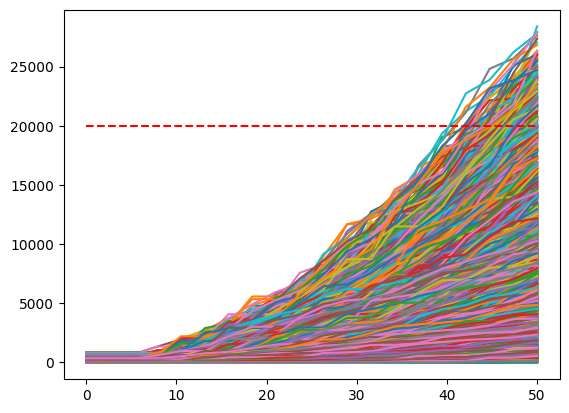

In [62]:
max_d = 50

for center in range(2418):

    ls_ds = np.linspace(0, max_d, 20)
    df_center = d_matrix.loc[[center], :].T
    df_center.columns = ['distance']
    df_center["biomass"] = df_ts['2017'].values

    ls_bm = []
    for d in ls_ds:
        ls_bm.append(df_center[df_center['distance'] <= d].biomass.sum())

    plt.plot(ls_ds, ls_bm)

plt.hlines(20000, xmin=0, xmax=max_d, colors='red', linestyles='dashed')

In [102]:
d_under_50.values()

dict_values([1820.841580232, 2575.9434457, 2340.0807693819997, 2364.35305295, 2795.492899895, 2535.7115955099994, 2523.259180987, 2752.7501477770006, 1009.779917164, 2344.545573322, 1837.7281447020002, 1305.8302983560002, 1027.166511596, 592.982928346, 2378.35327395, 2413.57198199, 3335.3553873000005, 3401.1936538820005, 3376.69103505, 3982.888621295, 4303.60788906, 2390.659852017, 2918.7247142439996, 3726.893690044, 3342.0842461439997, 2863.293334559, 2249.562041366, 1087.5699749590003, 1572.765978455, 1751.655478322, 2413.57198199, 3978.75887918, 4902.67738198, 4863.392773372, 4554.0473423, 4468.80968666, 5531.75463477, 3255.832324964, 4376.245500554, 4501.713048447, 4316.453253734, 3642.3592911090004, 2994.233887669, 2630.2390270919996, 1035.529550098, 284.744219746, 479.04524753, 3820.990280954, 4013.770819451, 5377.561995251001, 6058.494478789999, 6800.951912193999, 6573.36881425, 7037.93019105, 6375.914040526999, 5088.1208896240005, 5600.370593077, 5035.066179783998, 4709.6173553

In [118]:
np.array(list(d_under_50.values())) > 15000

array([False, False, False, ..., False, False, False])

In [133]:
df_ts.loc[:, ['2017', '2016']].mean(axis=1)

Index
0        6.284111
1       41.279396
2       66.192430
3       87.802036
4       21.309100
          ...    
2413     5.870414
2414     0.133205
2415     0.042934
2416     1.440317
2417     0.250621
Length: 2418, dtype: float64

In [138]:
d = 50

ls_indices = []
for center in range(2418):
    df_center = d_matrix.loc[[center], :].T
    df_center.columns = ['distance']
    df_center["biomass"] = df_ts['2017'].values
    bmu50 = df_center[df_center['distance'] <= d].biomass.sum()
    if bmu50 <= 20000 and bmu50 >= 15000:
        ls_indices.append(center)

len(ls_indices)

197

<Axes: xlabel='Longitude', ylabel='Latitude'>

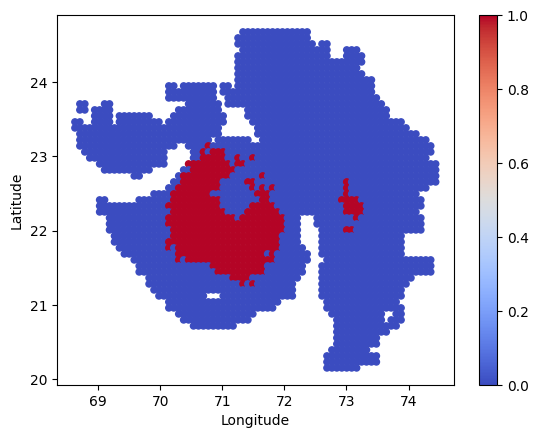

In [123]:
d = 50
# center = 200
d_under_50 = {}
# for d in range(50):
ls_bio_u50 = []
for center in range(2418):
    df_center = d_matrix.loc[[center], :].T
    df_center.columns = ['distance']
    df_center["biomass"] = df_ts['2017'].values
    bmu50 = df_center[df_center['distance'] <= d].biomass.sum()
    # ls_bio_u50.append(df_center[df_center['distance'] <= d].biomass.sum())
    # arr_u50 = np.sum((np.array(ls_bio_u50) <= 20000)&(15000 <= np.array(ls_bio_u50)))
    d_under_50[center] = bmu50

df_u50 = df_ts.loc[:, ['Latitude', 'Longitude']]
df_u50['biomass_u50'] = np.array(list(d_under_50.values())) > 15000

df_u50.plot.scatter(x='Longitude', y='Latitude', c=df_u50['biomass_u50'], cmap='coolwarm')

In [132]:
np.array(df_u50[df_u50['biomass_u50']].index)

array([ 728,  793,  795,  796,  797,  858,  859,  860,  861,  862,  865,
        868,  918,  919,  920,  921,  922,  923,  924,  925,  926,  928,
        929,  981,  982,  983,  984,  985,  986,  987,  988,  989, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1050, 1088,
       1089, 1090, 1091, 1092, 1093, 1094, 1095, 1101, 1102, 1121, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1157, 1159, 1161,
       1176, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1214, 1215,
       1216, 1232, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264,
       1265, 1274, 1275, 1290, 1291, 1292, 1293, 1321, 1322, 1323, 1324,
       1325, 1326, 1327, 1328, 1329, 1330, 1331, 1338, 1339, 1340, 1341,
       1342, 1357, 1358, 1359, 1360, 1388, 1389, 1390, 1391, 1392, 1393,
       1394, 1395, 1396, 1397, 1398, 1403, 1404, 1405, 1406, 1407, 1408,
       1409, 1423, 1424, 1425, 1426, 1450, 1451, 1452, 1453, 1454, 1455,
       1456, 1457, 1458, 1459, 1460, 1461, 1462, 14

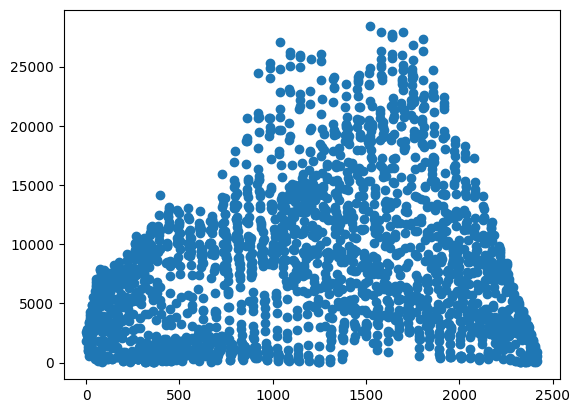

In [100]:
plt.plot(d_under_50.keys(), d_under_50.values(), 'o')

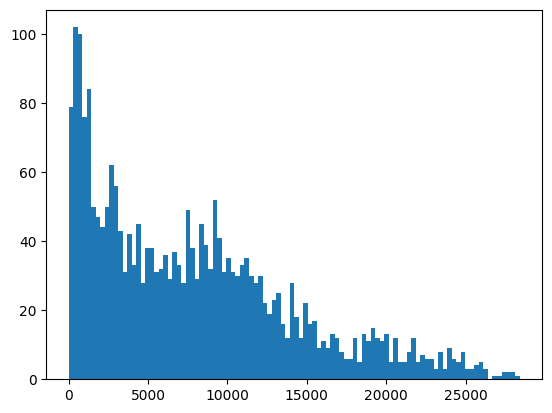

In [66]:
plt.hist(ls_bio_u50, bins=100);

In [61]:
ls_bm

[0.226953134,
 1.5312499849999999,
 65.48350436,
 694.5862114209999,
 1695.129034805,
 2830.9730085939996,
 4081.1012907439995,
 6164.202935697,
 9012.682333923998,
 13834.956376741,
 17105.327020011,
 22535.77230519,
 29728.781440321003,
 36343.51449917701,
 44514.03979039499,
 50560.245600853996,
 59416.3269327,
 70195.89975815499,
 78506.4923516,
 84827.078198826]